# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Данные содержат информацию о транспортных средствах марки BMW, выставленных на продажу. Это агрегированные данные с сайтов объявлений или из внутренней системы дилеров. В данных могут присутствуют такие признаки, как модель, год выпуска, тип топлива, пробег, цена, трансмиссия, налог на автомобиль, размер двигателя

### Условный заказчик
Команда аналитиков крупного онлайн-автомаркета (например, Auto.ru) или отдел стратегического планирования сети дилеров BMW.

### Возможные задачи ИАД
1. **Прогнозирование рыночной цены** автомобиля на основе его характеристик (регрессия).
2. **Сегментация автомобилей** для выделения групп с похожими параметрами и ценовым позиционированием
3. **Поиск аномалий** в объявлениях (например, мошеннические предложения с нереально низкой ценой).

## 2. Паспорт датасета

### Загрузка данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv(r"C:\Users\му-рс\OneDrive\Рабочий стол\vsc workspaces\lab1\data\bmw.csv")  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 10781 строк, 9 столбцов


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Структура данных

In [7]:
# Информация о столбцах и типах
print("Информация о датасете:")
df.info()

# Статистика по числовым признакам
print("Статистика по числовым признакам:")
df.describe()

Информация о датасете:
<class 'pandas.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  str    
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  str    
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  str    
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), str(3)
memory usage: 758.2 KB
Статистика по числовым признакам:


,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


## 3. Аудит качества данных

### 3.1. Пропуски

In [8]:
print("Анализ пропущенных значений:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({'Кол-во пропусков': missing_data, 'Доля, %': missing_percent.round(2)})
display(missing_table[missing_table['Кол-во пропусков'] > 0].sort_values(by='Доля, %', ascending=False))

Анализ пропущенных значений:


,Кол-во пропусков,"Доля, %"


### 3.2. Дубликаты

In [9]:
print("Поиск полных дубликатов строк:")
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Поиск полных дубликатов строк:
Полных дубликатов строк: 117


### 3.3. Типические проблемы значений

In [10]:
print("Числовые признаки:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
display(df[numeric_cols].describe().T)


print("Категориальные признаки:")
text_cols = []
for col in df.columns:
    
    sample = df[col].dropna().head(5)
    if len(sample) > 0 and isinstance(sample.iloc[0], str):
        text_cols.append(col)

if text_cols:
    for col in text_cols:
        print(f"{col}: {df[col].nunique()} уникальных значений")
else:
    print("Текстовых признаков не обнаружено")

Числовые признаки:


,count,mean,std,min,25%,50%,75%,max
year,10781.0,2017.078935,2.349038,1996.0,2016.0,2017.0,2019.0,2020.0
price,10781.0,22733.408867,11415.528189,1200.0,14950.0,20462.0,27940.0,123456.0
mileage,10781.0,25496.986550,25143.192559,1.0,5529.0,18347.0,38206.0,214000.0
tax,10781.0,131.702068,61.510755,0.0,135.0,145.0,145.0,580.0
mpg,10781.0,56.399035,31.336958,5.5,45.6,53.3,62.8,470.8
engineSize,10781.0,2.167767,0.552054,0.0,2.0,2.0,2.0,6.6


Категориальные признаки:
model: 24 уникальных значений
transmission: 3 уникальных значений
fuelType: 5 уникальных значений


### 3.4. Выбросы (пример для одного признака)

Поиск выбросов в числовых признаках
Признак: price
Количество выбросов по IQR: 484


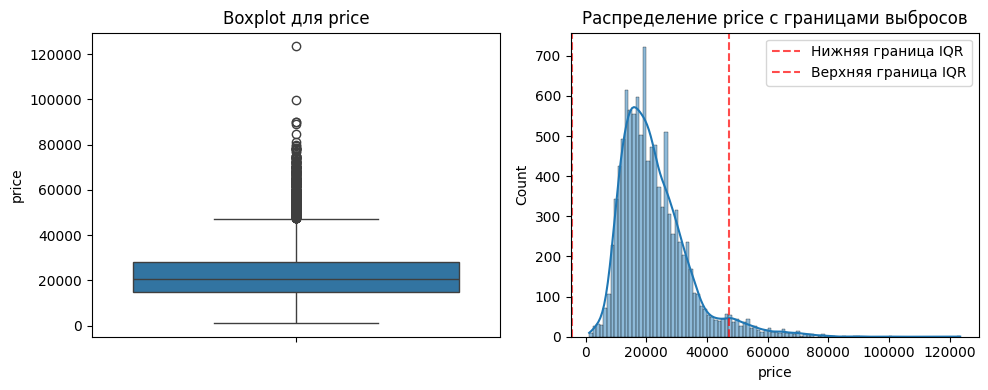

In [11]:
print("Поиск выбросов в числовых признаках")
target_numeric_col = 'price' 

if target_numeric_col in df.columns:
    Q1 = df[target_numeric_col].quantile(0.25)
    Q3 = df[target_numeric_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[target_numeric_col] < lower_bound) | (df[target_numeric_col] > upper_bound)]
    print(f"Признак: {target_numeric_col}")
    print(f"Количество выбросов по IQR: {outliers.shape[0]}")
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[target_numeric_col])
    plt.title(f'Boxplot для {target_numeric_col}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[target_numeric_col], kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', alpha=0.7, label=f'Нижняя граница IQR')
    plt.axvline(upper_bound, color='r', linestyle='--', alpha=0.7, label=f'Верхняя граница IQR')
    plt.title(f'Распределение {target_numeric_col} с границами выбросов')
    plt.legend()
    plt.tight_layout()
    plt.show()


## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

Распределение цены (price):


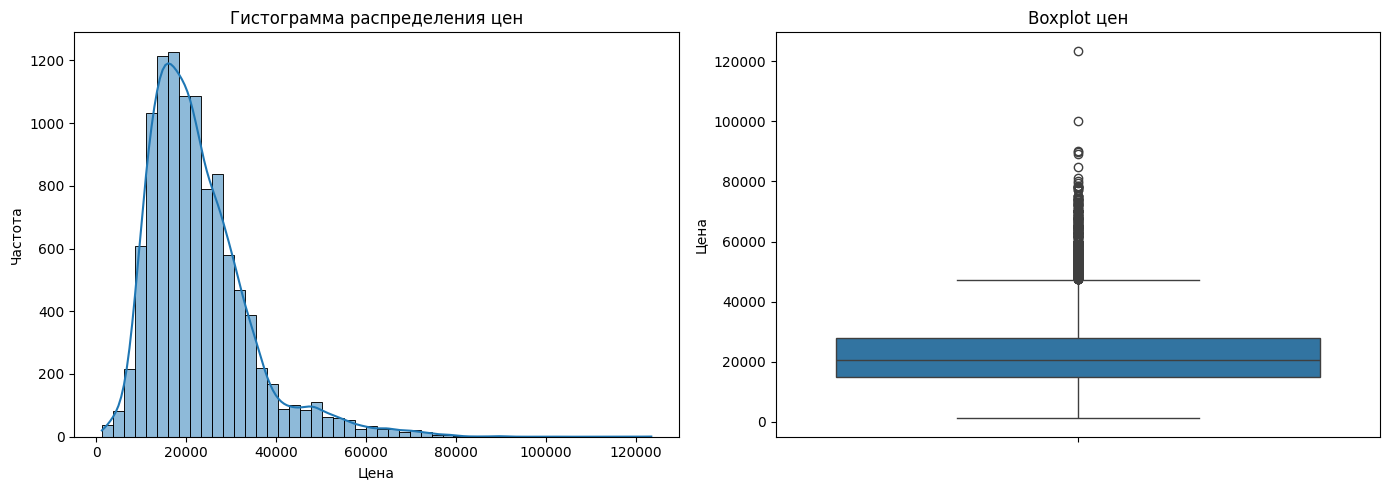

In [26]:
print("Распределение цены (price):")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.histplot(data=df, x='price', kde=True, bins=50, ax=axes[0])
axes[0].set_title('Гистограмма распределения цен')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')


sns.boxplot(data=df, y='price', ax=axes[1])
axes[1].set_title('Boxplot цен')
axes[1].set_ylabel('Цена')

plt.tight_layout()
plt.show()

### 4.2. Анализ категориального признака

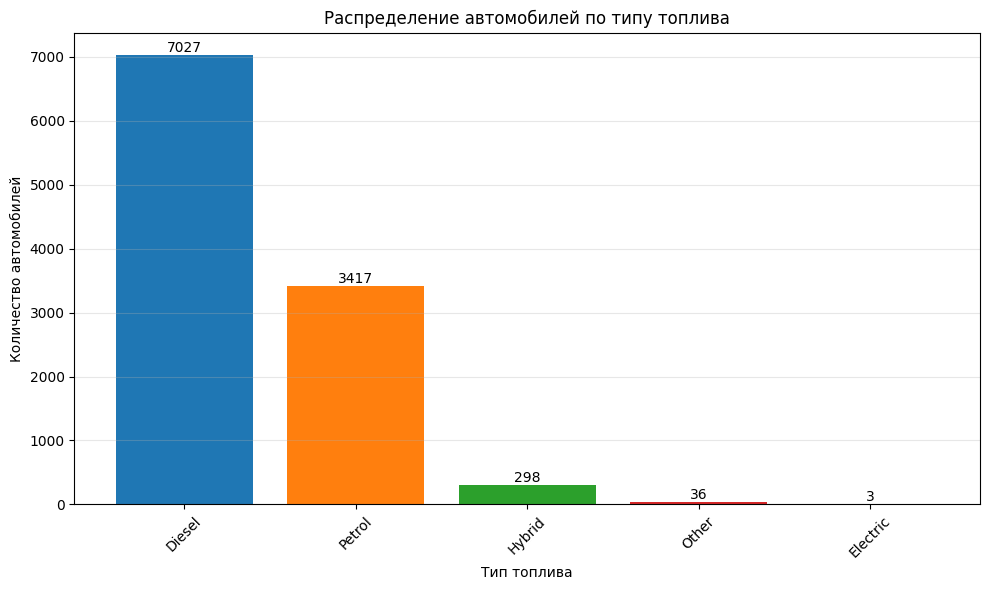

In [ ]:
plt.figure(figsize=(10, 6))

fuel_counts = df['fuelType'].value_counts().sort_values(ascending=False)

bars = plt.bar(fuel_counts.index, fuel_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Распределение автомобилей по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 4.3. Взаимосвязь двух признаков

#### Комментарий к визуализации распределения цены:
Распределение цен имеет правостороннюю асимметрию - большинство автомобилей имеет цену в нижнем диапазоне.
Boxplot показывает много выбросов в верхней части - это либо редкие модели, либо мошеннические объявления.
Гипотеза: для дальнейшего анализа может потребоваться логарифмирование цены или работа с выбросами.
Вопрос: Какие факторы влияют на формирование таких высоких цен?

#### Комментарий к визуализации распределения по типу топлива:
Наиболее популярным типом топлива является бензин и дизель.
Распределение неравномерное: бензиновые и дизельные автомобили преобладают над гибридами и электромобилями.
Гипотеза: тип топлива может влиять на цену и пробег автомобиля.
Вопрос: Как меняется распределение типов топлива по годам выпуска? Становятся ли гибриды и электромобили популярнее?

## 5. Выводы

Детали в файле `report/quality_report.md`